In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 



In [16]:
dataSet_train = pd.read_csv("/Users/bhushanchowdary/Documents/GitHub/Google_Stock_Prediction_RNN/google_dataset/Google_Stock_Price_Train.csv");
dataSet_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [17]:
train_set = dataSet_train.iloc[:,1:2].values


In [18]:
print(len(train_set))
print("*"*100)
print(train_set)


1258
****************************************************************************************************
[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [19]:
#we are doint Nomramlization of our values
from sklearn.preprocessing import MinMaxScaler
sc =MinMaxScaler(feature_range=(0,1))
train_set_transformed =sc.fit_transform(train_set)

In [20]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(train_set_transformed[i-60:i,0])
    y_train.append(train_set_transformed[i,0])
x_train,y_train =np.array(x_train),np.array(y_train)

In [21]:
x_train 

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [22]:
x_train =np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [23]:
# we only have 1198 row beacuse we took out 60 values for our y_train to train our model on simulation
x_train.shape

(1198, 60, 1)

In [24]:
device  = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'
print(f"using device {device}")

using device mps


In [25]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim=50, num_layers=4, dropout=0.2):
        super().__init__()

        self.lstm = nn.LSTM(input_size=input_dim, 
                            hidden_size=hidden_dim, 
                            num_layers=num_layers, 
                            dropout=dropout, 
                            batch_first=True)

        self.fc = nn.Linear(hidden_dim, 1)  # Output layer

    def forward(self, x):
        lstm_out, _ = self.lstm(x)  # Forward pass through LSTM layers
        output = self.fc(lstm_out[:, -1, :])  # Take last timestep's output
        return output



In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert X_train and y_train to PyTorch tensors
X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape for compatibility

# Create DataLoader
batch_size = 32
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define model, loss, and optimizer
input_dim = x_train.shape[2]  # Input shape should match last dimension of X_train
model = LSTMRegressor(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    model.train()  # Set model to training mode
    epoch_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()  # Clear gradients
        y_pred = model(X_batch)  # Forward pass
        loss = criterion(y_pred, y_batch)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        epoch_loss += loss.item()

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.6f}")

print("Training complete!")


Epoch [1/100], Loss: 0.096871
Epoch [2/100], Loss: 0.031041
Epoch [3/100], Loss: 0.004321
Epoch [4/100], Loss: 0.002685
Epoch [5/100], Loss: 0.002760
Epoch [6/100], Loss: 0.002336
Epoch [7/100], Loss: 0.002002
Epoch [8/100], Loss: 0.002044
Epoch [9/100], Loss: 0.001982
Epoch [10/100], Loss: 0.001863
Epoch [11/100], Loss: 0.001972
Epoch [12/100], Loss: 0.001745
Epoch [13/100], Loss: 0.001767
Epoch [14/100], Loss: 0.001691
Epoch [15/100], Loss: 0.001731
Epoch [16/100], Loss: 0.001620
Epoch [17/100], Loss: 0.001488
Epoch [18/100], Loss: 0.001637
Epoch [19/100], Loss: 0.001668
Epoch [20/100], Loss: 0.001785
Epoch [21/100], Loss: 0.001565
Epoch [22/100], Loss: 0.001438
Epoch [23/100], Loss: 0.001404
Epoch [24/100], Loss: 0.001420
Epoch [25/100], Loss: 0.001481
Epoch [26/100], Loss: 0.001565
Epoch [27/100], Loss: 0.001329
Epoch [28/100], Loss: 0.001324
Epoch [29/100], Loss: 0.001455
Epoch [30/100], Loss: 0.001254
Epoch [31/100], Loss: 0.001266
Epoch [32/100], Loss: 0.001220
Epoch [33/100], L

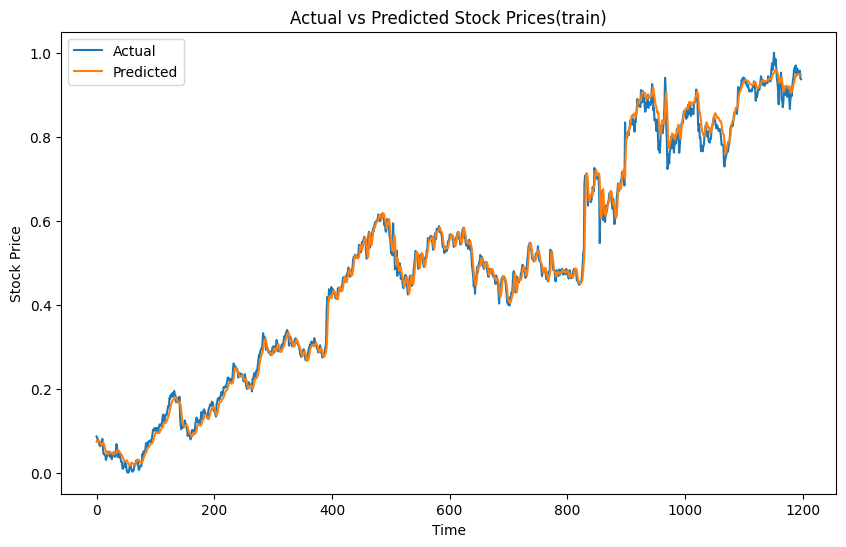

In [28]:
# Set model to evaluation mode
model.eval()

# Get predictions
with torch.no_grad():
    y_pred_tensor = model(X_train_tensor)

# Convert tensors to numpy arrays for plotting
y_pred = y_pred_tensor.numpy()
y_actual = y_train_tensor.numpy()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_actual, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices(train)')
plt.legend()
plt.show()

In [67]:
dataset_train = pd.read_csv('/Users/bhushanchowdary/Documents/GitHub/Google_Stock_Prediction_RNN/google_dataset/Google_Stock_Price_Train.csv')
real_stock_price = dataset_train.iloc[:, 1:2].values
print(len(dataset_train))

1258


In [68]:
dataset_test = pd.read_csv('/Users/bhushanchowdary/Documents/GitHub/Google_Stock_Prediction_RNN/google_dataset/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
print(len(dataset_test))

20


In [75]:
import numpy as np

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)  # Reshape to (40,1)
inputs = sc.transform(inputs)   # Now it works!


In [76]:
inputs.shape

(80, 1)

In [81]:
import torch

# Ensure model is in evaluation mode
model.eval()

# Convert inputs to PyTorch tensor
inputs_tensor = torch.tensor(inputs, dtype=torch.float32)

# Reshape to (batch_size=1, seq_length, features=1)
inputs_tensor = inputs_tensor.unsqueeze(0)  # Add batch dimension (1, seq_length)
# No need for extra unsqueeze(-1), LSTM expects (batch, seq_length, features)

# Move tensor to MPS
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
inputs_tensor = inputs_tensor.to(device)
model.to(device)

# Debugging shape
print(f"Inputs Shape: {inputs_tensor.shape}")  # Should be (1, seq_length, 1)

# Get predictions
with torch.no_grad():
    y_pred_tensor = model(inputs_tensor)  # Should work now!

# Convert predictions to NumPy for plotting
y_pred = y_pred_tensor.cpu().numpy()


Inputs Shape: torch.Size([1, 80, 1])


In [ ]:

y_pred_original = sc.inverse_transform(y_pred)

print(f"Predicted stock price for the next day: {y_pred_original[-1][0]:.2f}")


Predicted stock price for the next day: 798.59
